# Cluster similar Houses

### 1. Data cleaning & getting rid of irrelevant information before clustering

In [24]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv("/content/house_rental_data.csv.txt")

In [17]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [18]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [20]:
df.isnull().sum().sum()

0

In [21]:
df.duplicated().sum()

66

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.duplicated().sum()

0

### 2. Finding the optimal value of k

In [35]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [36]:
x = df
y = df['Price']

In [37]:
col = x.columns

In [61]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

In [63]:
x = pd.DataFrame(data = x, columns = col)

In [64]:
y = x['Price']

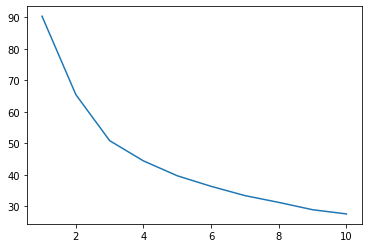

In [48]:
cs =[]
for i in  range(1,11):
  kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter = 300)
  kmeans.fit(x)
  cs.append(kmeans.inertia_)

plt.plot(range(1,11),cs)
plt.show()

### 3. Storing cluster to which the house belongs along with the data

In [81]:
km = KMeans(n_clusters = 2)
km.fit(x)
label = km.labels_
correct_label = sum(y == label)
print(f'{correct_label} out of {y.size} samples are correct')
print(f'The Accuracy is {correct_label/float(y.size)}')

2 out of 579 samples are correct
The Accuracy is 0.0034542314335060447


In [83]:
km = KMeans(n_clusters = 3)
km.fit(x)
label = km.labels_
correct_label = sum(y == label)
print(f'{correct_label} out of {y.size} samples are correct')
print(f'The Accuracy is {correct_label/float(y.size)}')

2 out of 579 samples are correct
The Accuracy is 0.0034542314335060447
